In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
# Make sure your CSV file is in the same folder as the notebook
df = pd.read_csv("smartwatch data.csv")

# Preview the dataset
print("Dataset Loaded Successfully ✅")
print("Shape:", df.shape)
df.head()


Dataset Loaded Successfully ✅
Shape: (204, 16)


,Person ID,Sleep Quality Label,Average Heart Rate (bpm),Max Heart Rate (bpm),Min Heart Rate (bpm),Total Calories (kcal),Total Distance (km),Light Sleep (min),Deep Sleep (min),REM Sleep (min),Total Sleep Duration (min),SpO₂ (%),Respiratory Rate (breaths/min),Sleep Quality Score,HRV (ms),Stress Score
0,1,Poor,81.7,99.7,70.7,2664.1,0.5,190.5,44.2,50.2,284.9,90.1,19.6,39.2,23.6,78.0
1,2,Poor,80.0,93.0,70.0,2823.5,1.9,215.6,50.6,46.7,312.9,91.9,18.7,43.5,32.7,68.2
2,3,Good,63.8,77.8,50.8,2433.9,6.8,202.5,94.7,106.8,404.0,96.3,13.8,83.6,57.4,34.6
3,4,Average,64.3,77.3,51.3,2514.3,4.1,200.8,71.4,91.6,363.8,98.0,16.7,68.2,29.3,68.5
4,5,Average,66.1,80.1,52.1,2367.3,4.4,194.6,82.1,75.5,352.2,97.7,15.7,57.3,31.6,76.8


In [2]:
# Step 3: Create Binary Target Column
df["sleep_disorder_risk"] = df["Sleep Quality Label"].apply(lambda x: 1 if x == "Poor" else 0)

# Check distribution
print(df["sleep_disorder_risk"].value_counts())
df[["Sleep Quality Label", "sleep_disorder_risk"]].head()


sleep_disorder_risk
0    181
1     23
Name: count, dtype: int64


,Sleep Quality Label,sleep_disorder_risk
0,Poor,1
1,Poor,1
2,Good,0
3,Average,0
4,Average,0


In [3]:
# Step 4: Select Useful Feature Columns
feature_cols = [
    'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Min Heart Rate (bpm)',
    'Total Calories (kcal)', 'Total Distance (km)', 'Light Sleep (min)',
    'Deep Sleep (min)', 'REM Sleep (min)', 'Total Sleep Duration (min)',
    'SpO₂ (%)', 'Respiratory Rate (breaths/min)', 'HRV (ms)', 'Stress Score'
]

X = df[feature_cols]
y = df["sleep_disorder_risk"]

print("Features and Target Ready ✅")
print("X shape:", X.shape)
print("y shape:", y.shape)


Features and Target Ready ✅
X shape: (204, 13)
y shape: (204,)


In [20]:
# Step 5: Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

# Step 6: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')
print("✅ Model Saved as 'random_forest_model.pkl'")
print("✅ Model Training Complete")


Training Set Size: (163, 13)
Test Set Size: (41, 13)
✅ Model Saved as 'random_forest_model.pkl'
✅ Model Training Complete


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.67      0.80         3

    accuracy                           0.98        41
   macro avg       0.99      0.83      0.89        41
weighted avg       0.98      0.98      0.97        41

🧱 Confusion Matrix:


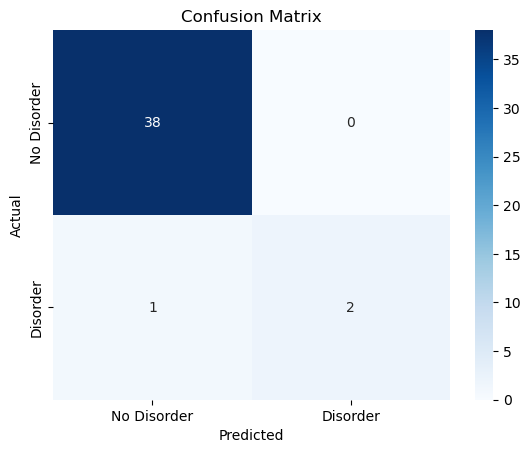

In [21]:
# Step 7: Predict on test data
y_pred = model.predict(X_test)

# Step 8: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧱 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disorder', 'Disorder'],
            yticklabels=['No Disorder', 'Disorder'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\ok\AppData\Local\Temp\ipykernel_2004\1652801168.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ok\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


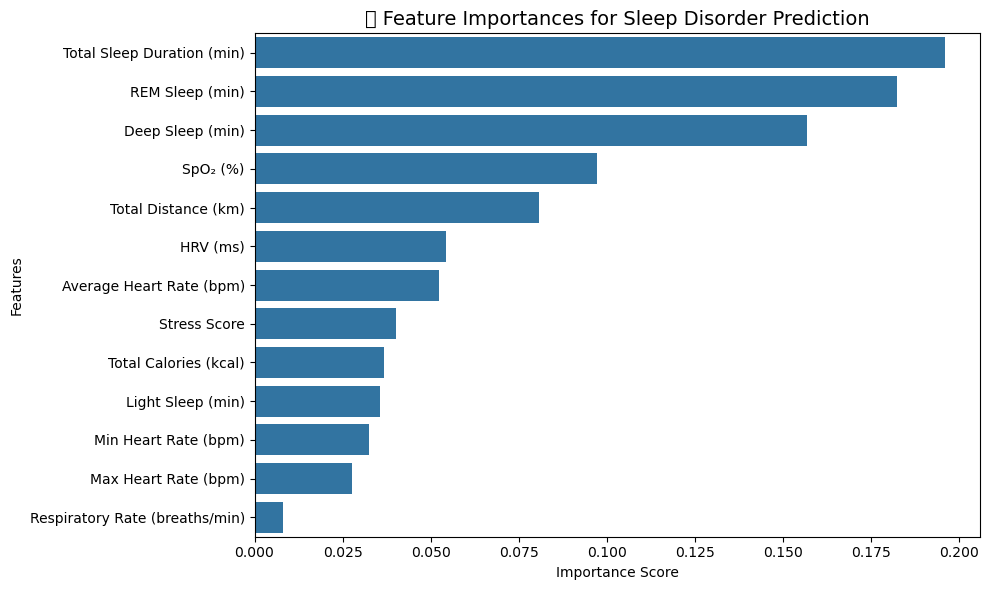

In [6]:
# Step 9: Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("📊 Feature Importances for Sleep Disorder Prediction", fontsize=14)
sns.barplot(x=importances[indices], y=[feature_cols[i] for i in indices])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [7]:
# Predict sabhi 204 logo pe
df["predicted_risk"] = model.predict(X)

# Filter karo sirf unko jinke predicted risk = 1 hai (i.e., Disorder)
at_risk_people = df[df["predicted_risk"] == 1]

# Show karo unka index number aur sleep-related columns
at_risk_people[["predicted_risk", "Total Sleep Duration (min)", "REM Sleep (min)", 
                "Deep Sleep (min)", "SpO₂ (%)"]]


,predicted_risk,Total Sleep Duration (min),REM Sleep (min),Deep Sleep (min),SpO₂ (%)
0,1,284.9,50.2,44.2,90.1
1,1,312.9,46.7,50.6,91.9
25,1,312.6,63.6,42.7,90.9
48,1,242.5,49.6,44.1,91.6
53,1,284.6,59.1,57.0,93.1
64,1,276.1,78.1,51.0,93.7
81,1,286.3,48.9,52.3,94.0
91,1,298.7,63.4,57.1,89.0
95,1,278.8,52.5,38.7,93.9
98,1,295.3,61.8,52.5,92.1


In [8]:
# Step: Predict for all 204 users
df["predicted_risk"] = model.predict(X)

# Step: Filter only those where model predicted sleep disorder (i.e., 1)
at_risk_people = df[df["predicted_risk"] == 1]

# Show top relevant info
print("🛌 Total people predicted at risk of sleep disorder:", at_risk_people.shape[0])
at_risk_people_display = at_risk_people[[
    "predicted_risk", 
    "Total Sleep Duration (min)", 
    "REM Sleep (min)", 
    "Deep Sleep (min)", 
    "SpO₂ (%)",
    "Stress Score"
]]

# Display table
at_risk_people_display.reset_index(drop=True)


🛌 Total people predicted at risk of sleep disorder: 22


,predicted_risk,Total Sleep Duration (min),REM Sleep (min),Deep Sleep (min),SpO₂ (%),Stress Score
0,1,284.9,50.2,44.2,90.1,78.0
1,1,312.9,46.7,50.6,91.9,68.2
2,1,312.6,63.6,42.7,90.9,52.3
3,1,242.5,49.6,44.1,91.6,74.1
4,1,284.6,59.1,57.0,93.1,81.4
5,1,276.1,78.1,51.0,93.7,73.5
6,1,286.3,48.9,52.3,94.0,63.8
7,1,298.7,63.4,57.1,89.0,73.3
8,1,278.8,52.5,38.7,93.9,73.3
9,1,295.3,61.8,52.5,92.1,76.5


In [9]:
def guess_disorder(row):
    if row["SpO₂ (%)"] < 94:
        return "Possible Sleep Apnea"
    elif row["Deep Sleep (min)"] < 60 and row["Stress Score"] > 60:
        return "Possible Insomnia"
    elif row["REM Sleep (min)"] < 40 and row["Total Sleep Duration (min)"] > 360:
        return "Possible Narcolepsy"
    else:
        return "Unclear / Low Risk"

at_risk_people["likely_disorder"] = at_risk_people.apply(guess_disorder, axis=1)
at_risk_people[["Total Sleep Duration (min)", "Deep Sleep (min)", "REM Sleep (min)", "SpO₂ (%)", "Stress Score", "likely_disorder"]]


C:\Users\ok\AppData\Local\Temp\ipykernel_2004\3125405491.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_people["likely_disorder"] = at_risk_people.apply(guess_disorder, axis=1)


,Total Sleep Duration (min),Deep Sleep (min),REM Sleep (min),SpO₂ (%),Stress Score,likely_disorder
0,284.9,44.2,50.2,90.1,78.0,Possible Sleep Apnea
1,312.9,50.6,46.7,91.9,68.2,Possible Sleep Apnea
25,312.6,42.7,63.6,90.9,52.3,Possible Sleep Apnea
48,242.5,44.1,49.6,91.6,74.1,Possible Sleep Apnea
53,284.6,57.0,59.1,93.1,81.4,Possible Sleep Apnea
64,276.1,51.0,78.1,93.7,73.5,Possible Sleep Apnea
81,286.3,52.3,48.9,94.0,63.8,Possible Insomnia
91,298.7,57.1,63.4,89.0,73.3,Possible Sleep Apnea
95,278.8,38.7,52.5,93.9,73.3,Possible Sleep Apnea
98,295.3,52.5,61.8,92.1,76.5,Possible Sleep Apnea


In [14]:
# Step 1: Disorder Guess Function
def guess_disorder(row):
    spo2 = row["SpO₂ (%)"]
    deep = row["Deep Sleep (min)"]
    rem = row["REM Sleep (min)"]
    total_sleep = row["Total Sleep Duration (min)"]
    stress = row["Stress Score"]
    
    if spo2 < 94:
        return "Possible Sleep Apnea"
    elif deep < 60 and stress > 65:
        return "Possible Insomnia"
    elif rem < 40 and total_sleep > 360:
        return "Possible Narcolepsy"
    elif total_sleep < 300 and rem < 50:
        return "Poor Sleep / Fragmentation"
    else:
        return "Normal / Low Risk"

# Step 2: Apply function
df["likely_disorder"] = df.apply(guess_disorder, axis=1)

# Step 3: Add User ID
df["User_ID"] = range(1, len(df) + 1)

# Step 4: Final Output Table
final_chart = df[[
    "User_ID", 
    "Total Sleep Duration (min)",
    "REM Sleep (min)", 
    "Deep Sleep (min)", 
    "SpO₂ (%)", 
    "Stress Score", 
    "likely_disorder"
]]

# Step 5: Show Full Table
pd.set_option('display.max_rows', 205)
display(final_chart)


,User_ID,Total Sleep Duration (min),REM Sleep (min),Deep Sleep (min),SpO₂ (%),Stress Score,likely_disorder
0,1,284.9,50.2,44.2,90.1,78.0,Possible Sleep Apnea
1,2,312.9,46.7,50.6,91.9,68.2,Possible Sleep Apnea
2,3,404.0,106.8,94.7,96.3,34.6,Normal / Low Risk
3,4,363.8,91.6,71.4,98.0,68.5,Normal / Low Risk
4,5,352.2,75.5,82.1,97.7,76.8,Normal / Low Risk
5,6,347.7,75.6,73.8,93.4,68.5,Possible Sleep Apnea
6,7,406.4,102.8,87.2,95.9,32.6,Normal / Low Risk
7,8,392.3,92.9,94.0,97.1,33.1,Normal / Low Risk
8,9,411.1,92.2,95.0,99.1,41.8,Normal / Low Risk
9,10,384.5,108.8,77.0,97.1,35.6,Normal / Low Risk


In [16]:
# Step 1: Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Initialize and Train Model
log_reg = LogisticRegression(max_iter=900, random_state=42)
log_reg.fit(X_train, y_train)

# Step 3: Predict on Test Set
y_pred_lr = log_reg.predict(X_test)

# Step 4: Evaluate the Model
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00         3

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41


🧱 Confusion Matrix:
[[38  0]
 [ 0  3]]


In [17]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"✅ Logistic Regression Accuracy: {accuracy_lr:.2f}")


✅ Logistic Regression Accuracy: 1.00


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Optional: Use F1-score for better class-imbalance handling
scorer = make_scorer(f1_score)

# 5-fold Cross Validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring=scorer)

# Results
print("📊 5-Fold Cross Validation (F1 Score):")
print(f"Scores: {cv_scores}")
print(f"Mean F1 Score: {np.mean(cv_scores):.4f}")
print(f"Std Dev: {np.std(cv_scores):.4f}")


📊 5-Fold Cross Validation (F1 Score):
Scores: [0.66666667 1.         0.90909091 0.85714286 1.        ]
Mean F1 Score: 0.8866
Std Dev: 0.1229


In [19]:
# Accuracy instead of F1
cv_acc = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print(f"\n✅ Accuracy CV Scores: {cv_acc}")
print(f"Mean Accuracy: {np.mean(cv_acc):.4f}")



✅ Accuracy CV Scores: [0.92682927 1.         0.97560976 0.97560976 1.        ]
Mean Accuracy: 0.9756
